In [21]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score


def data_import_save(url =  "https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv", 
                         savepath = '..\\src\\data\\churn_detection_raw.csv'):
    df_temp = pd.read_csv(url)
    df_temp.to_csv(savepath)
    return df_temp

# a function that returns each colum unique values, whit the amount of uniques
def info_dados(df):
    columns = df.columns
    for column in columns:
        print(f'Column: {column}')
        print(df[column].unique(), f'Shape: {df[column].unique().shape[0]}')
        

In [22]:
df_raw = data_import_save()
df = pd.get_dummies(df_raw,drop_first=True)
df

,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge_Sim,Dependentes_Sim,TelefoneFixo_Sim,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,...,TVaCabo_Sim,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,PagamentoOnline_Sim,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn_Sim
0,0,1,29.85,1,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1,0,34,56.95,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,2,53.85,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
3,0,45,42.30,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,2,70.70,0,0,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,0,1,0,0,...,1,0,1,0,1,1,0,1,0,0
7039,0,72,103.20,1,1,1,0,1,1,0,...,1,0,1,0,1,1,0,0,0,0
7040,0,11,29.60,1,1,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
7041,1,4,74.40,1,0,1,0,1,1,0,...,0,0,0,1,0,1,0,1,0,1


In [23]:
info_dados(df_raw)


Column: Maior65Anos
[0 1] Shape: 2
Column: Conjuge
['Sim' 'Nao'] Shape: 2
Column: Dependentes
['Nao' 'Sim'] Shape: 2
Column: MesesDeContrato
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] Shape: 73
Column: TelefoneFixo
['Nao' 'Sim'] Shape: 2
Column: VariasLinhasTelefonicas
['SemServicoTelefonico' 'Nao' 'Sim'] Shape: 3
Column: ServicoDeInternet
['DSL' 'FibraOptica' 'Nao'] Shape: 3
Column: SegurancaOnline
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3
Column: BackupOnline
['Sim' 'Nao' 'SemServicoDeInternet'] Shape: 3
Column: SeguroNoDispositivo
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3
Column: SuporteTecnico
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3
Column: TVaCabo
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3
Column: StreamingDeFilmes
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3
Column: TipoDeContrato
['M

é importante destacar que os clientes que não tem serviço online automaticamente não teriam os serviços relacionados e portanto poderiam se relacionar de forma direta ao "Não" dos dados.  
Uma análise de correlação entre essa variável "Sem serviço de internet" e o Churn pode ajudar a decidir

In [25]:
df.corr()['Churn_Sim'].sort_values()

MesesDeContrato                                -0.352229
SeguroNoDispositivo_SemServicoDeInternet       -0.227890
TVaCabo_SemServicoDeInternet                   -0.227890
SuporteTecnico_SemServicoDeInternet            -0.227890
BackupOnline_SemServicoDeInternet              -0.227890
StreamingDeFilmes_SemServicoDeInternet         -0.227890
ServicoDeInternet_Nao                          -0.227890
SegurancaOnline_SemServicoDeInternet           -0.227890
TipoDeContrato_UmAno                           -0.177820
SegurancaOnline_Sim                            -0.171226
SuporteTecnico_Sim                             -0.164674
Dependentes_Sim                                -0.164221
Conjuge_Sim                                    -0.150448
FormaDePagamento_DebitoEmConta                 -0.117937
FormaDePagamento_ChequePapel                   -0.091683
BackupOnline_Sim                               -0.082255
SeguroNoDispositivo_Sim                        -0.066160
VariasLinhasTelefonicas_SemServ

<AxesSubplot: >

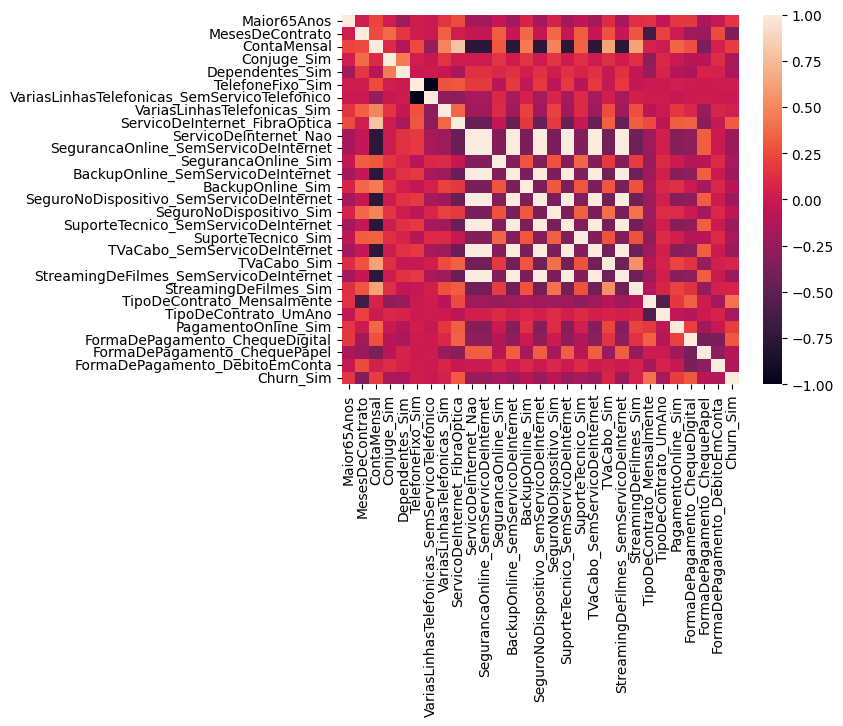

In [5]:
sns.heatmap(df.corr(),xticklabels=1, yticklabels=1)

A pesar de de apresentarem uma correlação fraca +- 0,2, há uma diferença entre o cliente não ter o serviço e ele ter e apenas optar por não assinar o serviço.

<AxesSubplot: xlabel='Churn', ylabel='count'>

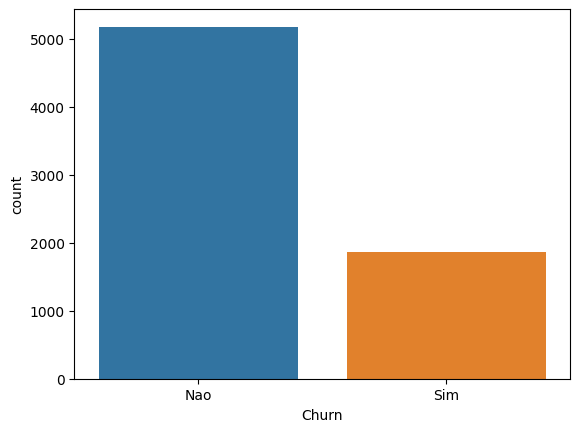

In [6]:
sns.countplot(x='Churn', data=df_raw)

O banco de dados está desbalanceado quanto ao Churn, um balanceamento por oversampling será feito com o SMOTE

In [7]:
y = df.Churn_Sim
X = df.drop('Churn_Sim', axis=1)

In [8]:
smt = SMOTE(random_state=123)  
X, y = smt.fit_resample(X, y)  
y.value_counts()

0    5174
1    5174
Name: Churn_Sim, dtype: int64

<AxesSubplot: xlabel='TipoDeContrato_Mensalmente', ylabel='count'>

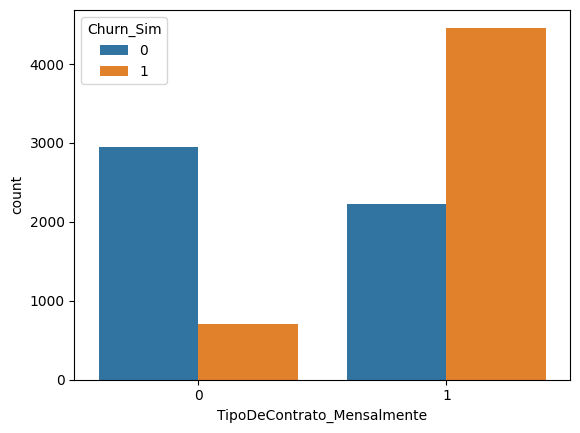

In [35]:
sns.countplot(x=X[X.columns[22]], hue=y)

## KNN

In [32]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=42)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7944363103953148

In [13]:
print(confusion_matrix(y_test,knn.predict(X_test)))


[[1282  448]
 [ 254 1431]]


# Naive Bayes


In [14]:
from sklearn.naive_bayes import BernoulliNB

In [15]:
bnb = BernoulliNB(binarize=np.mean(X_train))
bnb.fit(X_train,y_train)
bnb.score(X_test,y_test)


0.7879941434846266

In [16]:
print(confusion_matrix(y_test,bnb.predict(X_test)))


[[1240  490]
 [ 234 1451]]


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
tree.score(X_test,y_test)

0.7669106881405564

In [21]:
a = pd.DataFrame([df.drop('Churn_Sim', axis=1).columns.tolist(),tree.feature_importances_.tolist()])
a = a.transpose()
a.sort_values(by = 1,ascending=False).head(5)

,0,1
22,TipoDeContrato_Mensalmente,0.507399
1,MesesDeContrato,0.189806
8,ServicoDeInternet_FibraOptica,0.094572
11,SegurancaOnline_Sim,0.082763
9,ServicoDeInternet_Nao,0.064861


In [22]:
print(confusion_matrix(y_test,tree.predict(X_test)))

[[1232  498]
 [ 298 1387]]


# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [24]:
lr.fit(X_train,y_train)

LogisticRegression()

# Comparação entre os modelos

O objetivo da análise é detectar os clientes mais provávei de deixarem a empresa e intervir e oferecer um produto.
Para isso, uma opção é avaliar seria avaliar a precisão, porém o score F1 e a área abaixo da curva ROC são melhores.

In [25]:
print('O score F1 do KNN é:',f1_score(y_test,knn.predict(X_test)))
print('O score F1 do Naive Bayes é:',f1_score(y_test,bnb.predict(X_test)))
print('O score F1 do Árvore de Decisão é:',f1_score(y_test,tree.predict(X_test)))
print('O score F1 da Regressão Logistica é:',f1_score(y_test,tree.predict(X_test)))

O score F1 do KNN é: 0.8030303030303031
O score F1 do Naive Bayes é: 0.8003309431880861
O score F1 do Árvore de Decisão é: 0.7770308123249301
O score F1 da Regressão Logistica é: 0.7770308123249301


In [26]:
print('O score AUC ROC do KNN é:',roc_auc_score(y_test,knn.predict(X_test)))
print('O score AUC ROC do Naive Bayes é:',roc_auc_score(y_test,bnb.predict(X_test)))
print('O score AUC ROC do Árvore de Decisão é:',roc_auc_score(y_test,tree.predict(X_test)))
print('O score F1 da Regressão Logistica é:',roc_auc_score(y_test,tree.predict(X_test)))

O score AUC ROC do KNN é: 0.7951493113325673
O score AUC ROC do Naive Bayes é: 0.7889453011097579
O score AUC ROC do Árvore de Decisão é: 0.7676420644585856
O score F1 da Regressão Logistica é: 0.7676420644585856


Nas duas métricas o melhor modelo foi o KNN e o mesmo podeá fazer a previsão se um novo cliente vai deixar a empresa.
Porém a Regressão logistica e a árvore de decisão podem dar importâncias de variáveis, que podem fornecer dias de o porquê o cliente deixa a empresa.

In [27]:
lr.coef_

array([[-0.07663046, -0.85257461,  8.26084315, -0.11652055, -0.22698505,
        -2.55099868, -0.70535673, -0.62889994, -3.00675032,  0.33888175,
         0.33888175, -0.83526226,  0.33888175, -0.802118  ,  0.33888175,
        -0.6822229 ,  0.33888175, -0.8879683 ,  0.33888175, -1.22199462,
         0.33888175, -1.26376636,  0.18602083, -0.18577223, -0.02555661,
        -0.16311852, -0.25488217, -0.37699476]])

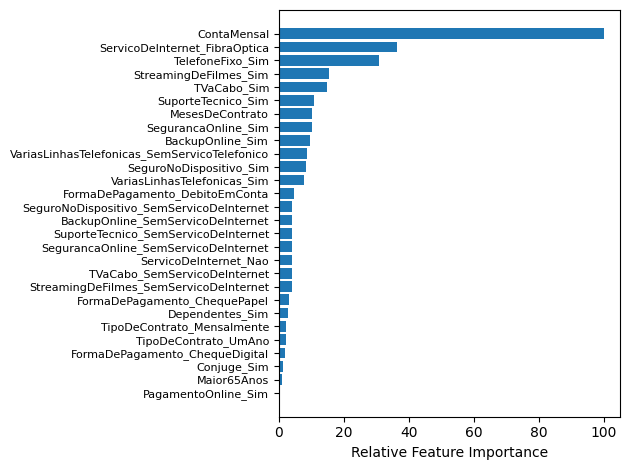

In [28]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()